___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [141]:
train = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [142]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [144]:
train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

(10.0, 70.0)

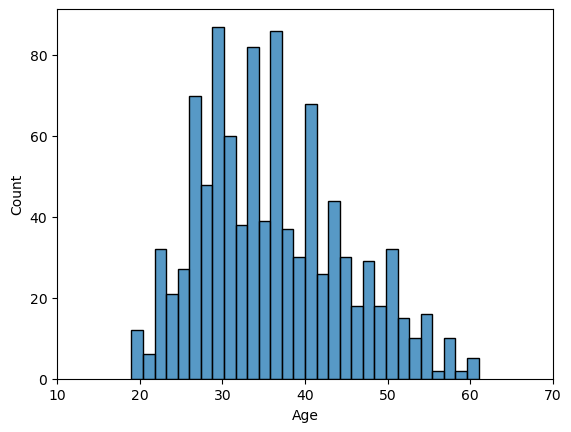

In [145]:
sns.histplot(data=train,x='Age',bins=30)
plt.xlim(10,70)

**Create a jointplot showing Area Income versus Age.**

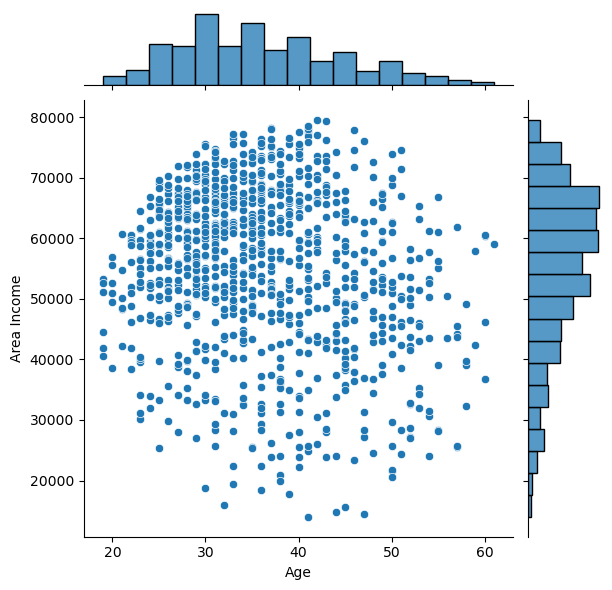

In [146]:
sns.jointplot(data=train,y='Area Income',x='Age',kind='scatter')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

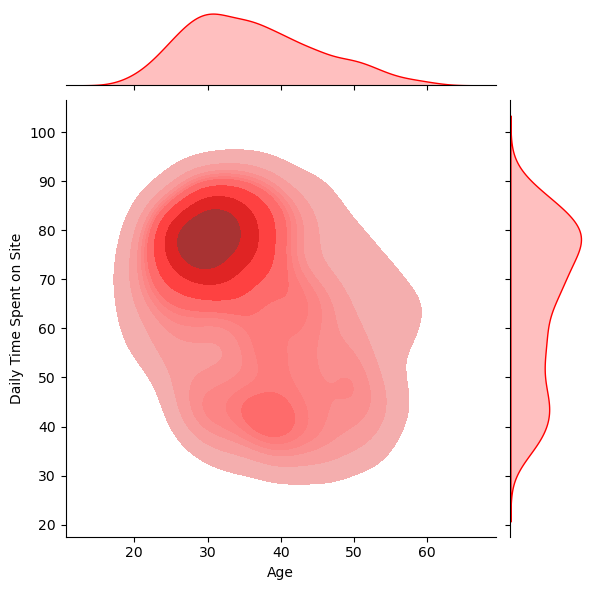

In [147]:
joint_plot = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=train, kind='kde', color='red', fill=True)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

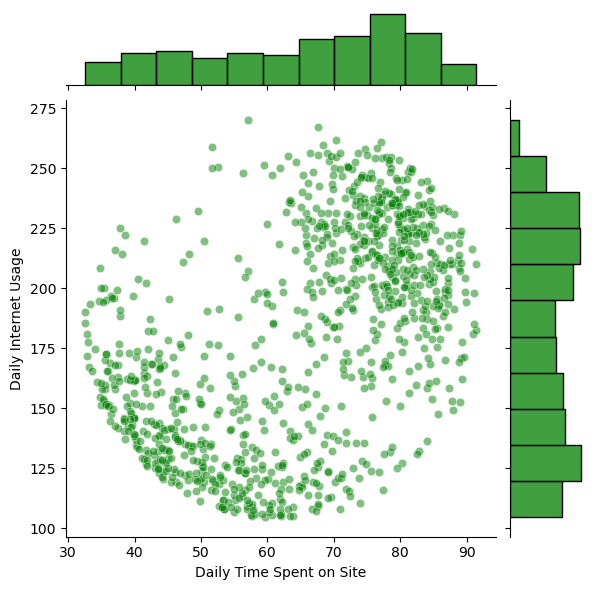

In [148]:
sns.jointplot(data=train,x='Daily Time Spent on Site',y='Daily Internet Usage',kind='scatter',color='green',alpha=0.5)


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

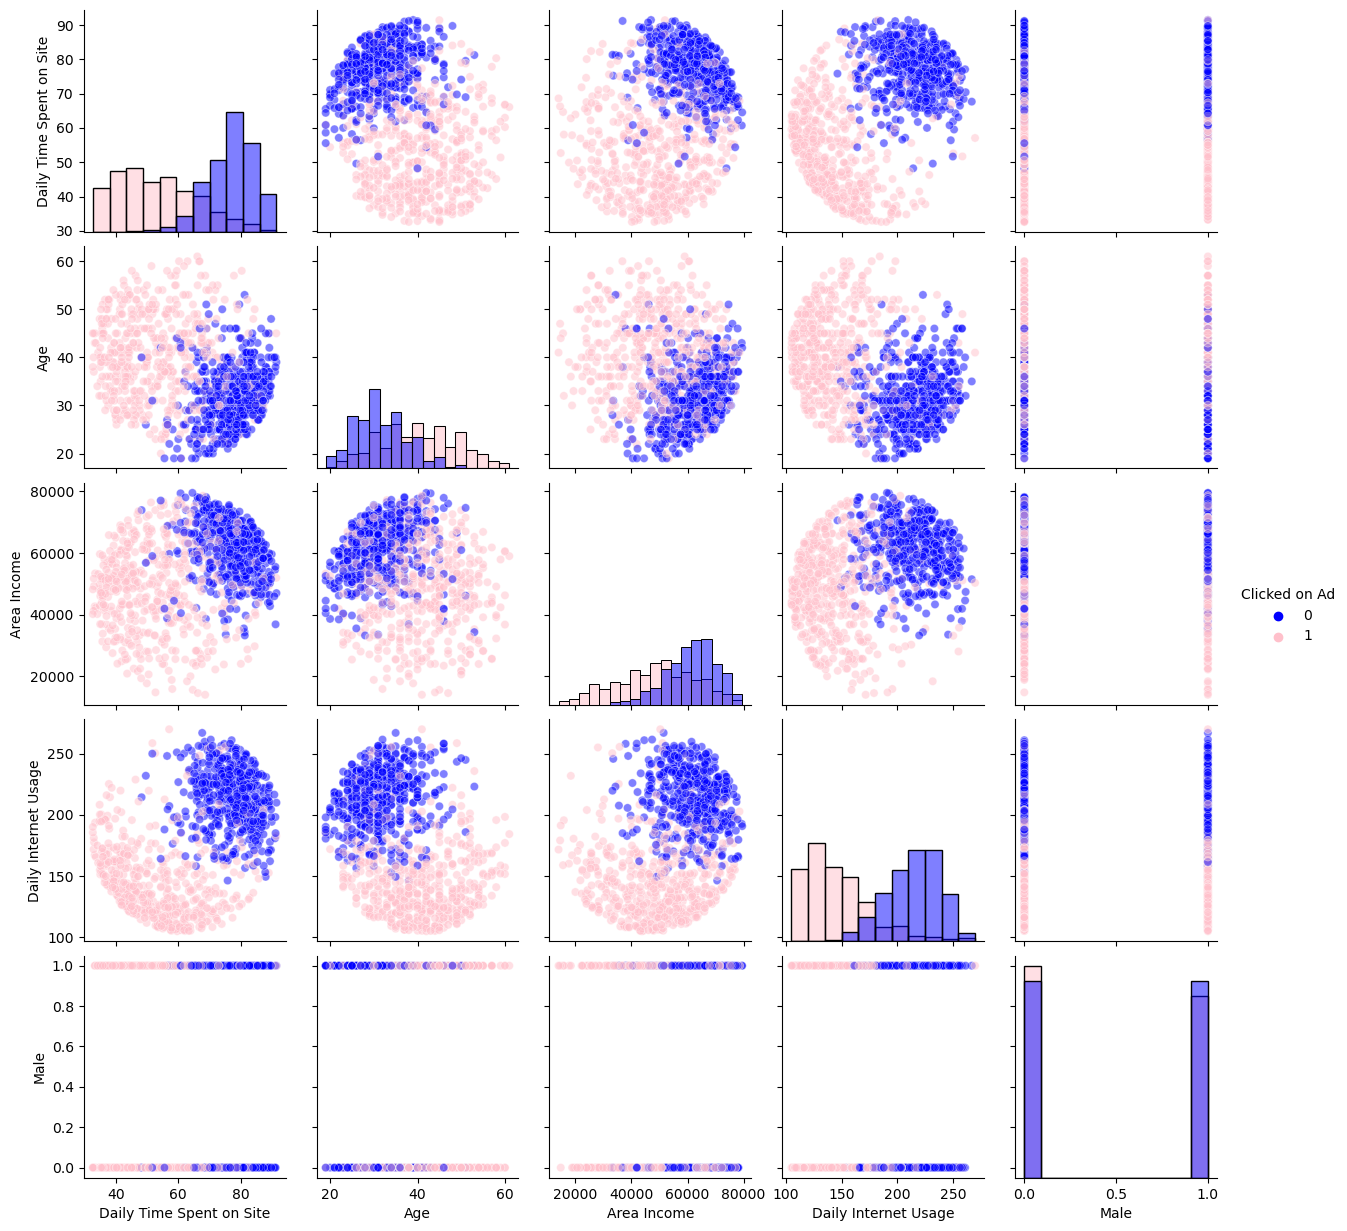

In [149]:
pair_plot = sns.pairplot(train, hue='Clicked on Ad', diag_kind='hist', palette={0: "blue", 1: "pink"},plot_kws={'alpha':0.5})


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [150]:
train.drop(['Timestamp','Country','City','Ad Topic Line'],axis=1,inplace=True)

In [151]:
from sklearn.model_selection import train_test_split

X=train.drop('Clicked on Ad',axis=1)
y=train['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

feature scaling

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Define grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set: 0.96


C:\Users\lklkl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lklkl\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lklkl\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lklkl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

## Predictions and Evaluations
** Now predict values for the testing data.**

In [156]:
predictions = logmodel.predict(X_test)

** Create a Confusion Matrix for the model.**

In [157]:
confusion_matrix(predictions,y_test)

array([[ 86,   5],
       [  3, 106]], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(predictions,y_test)

0.96

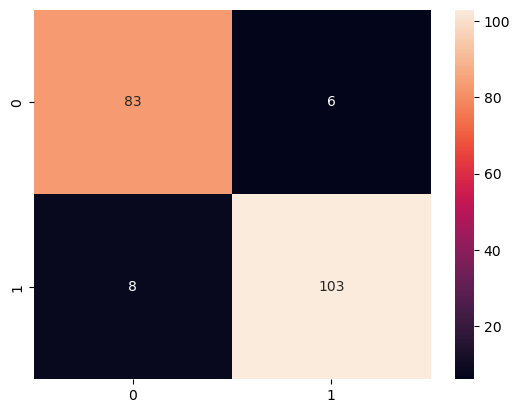

In [159]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')

## k-Nearest Neighbors

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.935


In [162]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

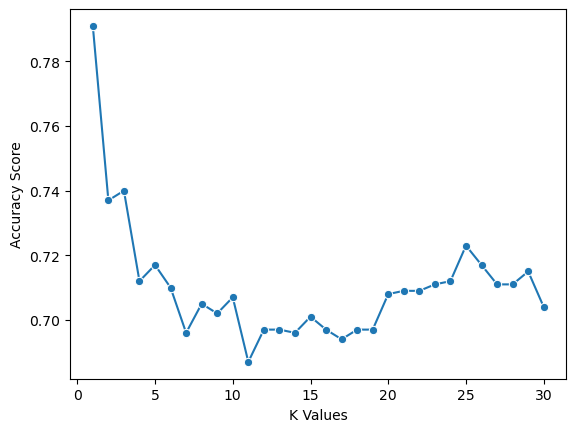

In [163]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [164]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.91


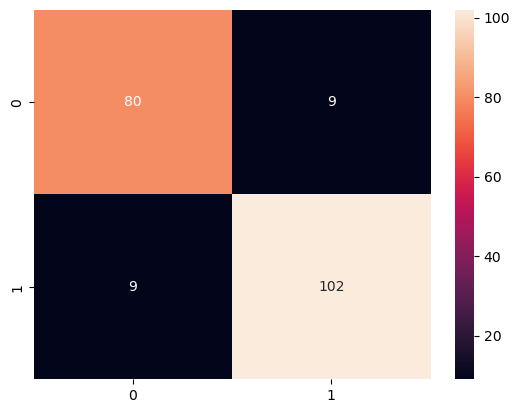

In [165]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')

# random forest classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [167]:
y_pred = rf_clf.predict(X_test)

In [168]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.93

In [169]:
print(confusion_matrix(y_test, y_pred))

[[ 83   6]
 [  8 103]]


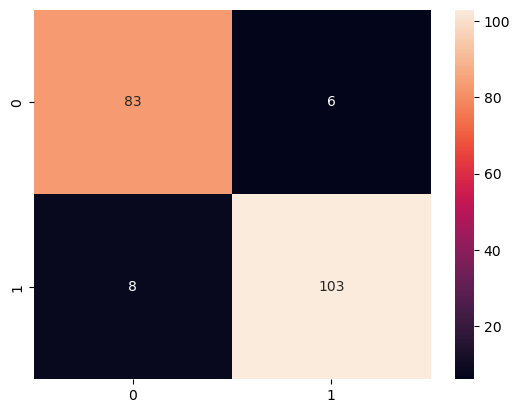

In [170]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')

# Summary 
 - the best model is logistic regression with accuracy 96%
 - Random Forest with accuracy 93&
 - KNN with accuracy 91%

## Great Job!